# __Hands-on with TensorFlow: Part A__

Let's see how TensorFlow works and build a deep neural network model using the MNIST dataset.

## Steps to be followed:
1. Import TensorFlow
2. Load the MNIST dataset
3. Create the model
4. Get predictions from the model
5. Apply softmax activation to the predictions
6. Define the loss function
7. Compile the model
8. Train the model
9. Evaluate the model
10. Create a probability model

## Step 1: Import TensorFlow

- Import TensorFlow and check its version.


In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

2024-07-26 03:01:27.877455: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB
TensorFlow version: 2.13.1


## Step 2: Load the MNIST dataset

- Load the MNIST dataset and normalize the input data by dividing the train and test sets by 255.



In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
#normalize data
x_train, x_test = x_train / 255.0, x_test / 255.0

__Observation:__
- The dataset has been downloaded.

## Step 3: Create the model

- Create a Sequential model with flatten, dense, and dropout layers.


In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
# Encode labels
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_test_encoded = tf.keras.utils.to_categorical(y_test)

In [10]:
# train the model
from livelossplot import PlotLossesKerasTF

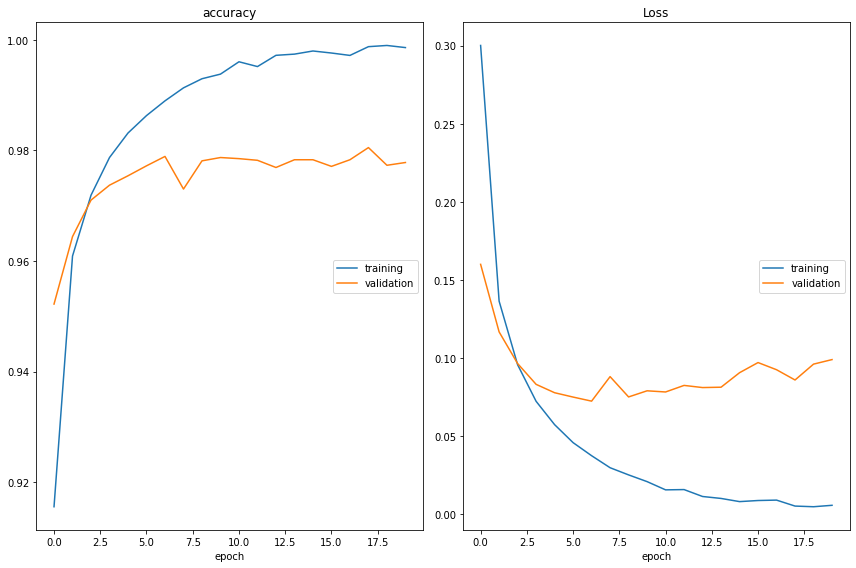

accuracy
	training         	 (min:    0.916, max:    0.999, cur:    0.999)
	validation       	 (min:    0.952, max:    0.980, cur:    0.978)
Loss
	training         	 (min:    0.005, max:    0.300, cur:    0.006)
	validation       	 (min:    0.072, max:    0.160, cur:    0.099)
938/938 [==============================] - 4s 4ms/step - loss: 0.0058 - accuracy: 0.9986 - val_loss: 0.0991 - val_accuracy: 0.9778


In [14]:
model.fit(x_train,y_train_encoded,epochs=20,batch_size=64,validation_data=(x_test,y_test_encoded),
         callbacks=[PlotLossesKerasTF()])

## Step 4: Get predictions from the model

- Get the predictions from the model using the train data for one column, as the optimizer is not yet applied.


In [22]:
predictions = model.predict(x_train)
predictions

import pandas as pd
pd.DataFrame(predictions)

y_train_pred=predictions.argmax(axis=1)

pd.crosstab(y_train,y_train_pred)

1875/1875 [==============================] - 1s 670us/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,5922,0,0,0,0,0,1,0,0,0
1,0,6741,0,0,0,0,0,1,0,0
2,0,2,5956,0,0,0,0,0,0,0
3,0,0,3,6124,0,2,0,0,1,1
4,0,0,0,0,5840,0,1,0,0,1
5,0,0,0,2,0,5419,0,0,0,0
6,0,0,0,0,0,2,5916,0,0,0
7,0,2,0,0,2,0,0,6261,0,0
8,0,5,10,16,0,6,0,0,5812,2


In [23]:
predictions_test = model.predict(x_test)
y_test_pred=predictions_test.argmax(axis=1)

pd.crosstab(y_test,y_test_pred)

313/313 [==============================] - 0s 1ms/step


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,970,0,1,1,1,1,3,1,2,0
1,0,1128,2,0,0,0,1,1,3,0
2,4,2,1017,1,1,0,1,2,3,1
3,0,0,6,990,0,6,0,2,2,4
4,0,0,3,1,965,0,4,3,1,5
5,1,0,0,8,1,870,7,1,3,1
6,3,3,2,1,5,4,938,1,1,0
7,1,6,10,4,0,1,0,1002,2,2
8,4,1,8,13,7,4,3,3,928,3


# Evaluate model

__Observation:__
- An array of predicted values is displayed.

# Binary Classification

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

#define x and y
#split into train and test
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
#fit the model
model.fit(x_train,y_train,epochs=20,batch_size=64,validation_data=(x_test,y_test),
         callbacks=[PlotLossesKerasTF()])